# WORKFLOW

## Step 1: Importing Libraries & The Original Data

---



## Step 2: Exploratory Data Analysis: Understanding the Original Data

**We will analyse and plot:**

2.1.   the number of cars per brand to get a feeling of the distirbution of the dataset under the *'brand'* column

2.2.   the distribution of the model year

2.3.   the distribution of the milage

2.4.   the distribution of prices

2.5.   the various fuel types, engines, and transmissions

2.6.   the vehicles with a reported accident vs those that have not reported one


---


## Step 3: Data Cleaning, Pre-Processing & Feature Engineering

3.1   removal of redundant features following the EDA

3.2   dropping records with limited statistical importance while ensuring this does not result in a certain class being underrepresented, subsequently leading to an imbalanced dataset

3.3. Missing data under the Engine Volume, HP, and/or Cylinders columns and the car is electric, the former and the latter will be set to 0.

3.4. We drop the 'clean_title' column since it contains a single unique value across all records and hence adds no value

3.5. We drop the interior and exterior colour columns as they are believed to not add any statistical significance and are irrelevant given the project scope

3.6. categorical brackets for some numeric data to decrease dimensionality

3.7. We create new columns "Engine Volume", "HP", "Cylinders" by using the available data under the 'engine' column where that is applicable


---


## Step 4: Exploring the new features and cleaning if necessary

In [72]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Pre-Processing
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

sns.set(style = 'whitegrid')
sns.set_context('notebook')

data = pd.read_csv('/content/train.csv')

data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# Step 2: Exploratory Data Analysis

## 2.1. Brand

Number of cars:  188533
Number of brands:  57


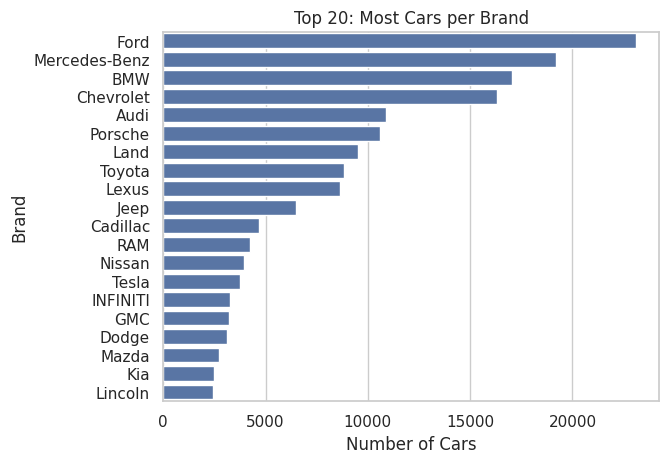

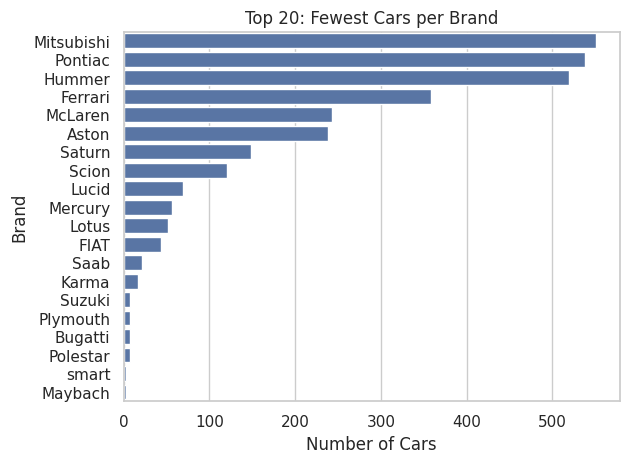

In [73]:
# the 20 brands with the most presence in the dataset
print("Number of cars: ", data.shape[0])
print("Number of brands: ", data['brand'].nunique())

sns.countplot(data = data, y = 'brand', order = data['brand'].value_counts().iloc[:20].index)
plt.title('Top 20: Most Cars per Brand')
plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.show()

print('\n')

# the 20 brands with the least presence in the dataset
sns.countplot(data = data, y = 'brand', order = data['brand'].value_counts().iloc[-20:].index)
plt.title('Top 20: Fewest Cars per Brand')
plt.xlabel('Number of Cars')
plt.ylabel('Brand')
plt.show()

## 2.2. Model Year

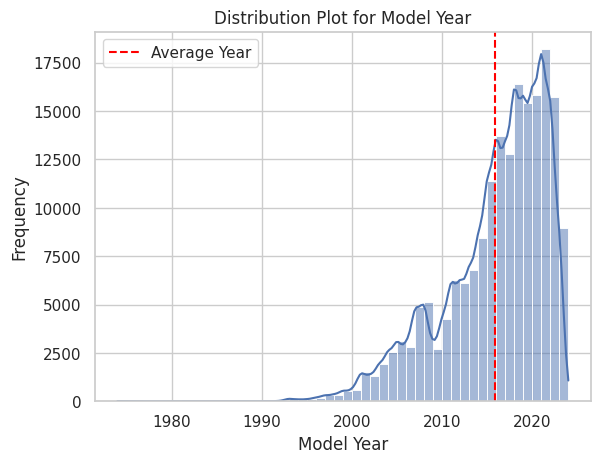

In [74]:
# a histogram of the distirbution of the model year
sns.histplot(data['model_year'], kde = True, bins = 50)
plt.axvline(data['model_year'].mean(), color='red', linestyle='--', label = 'Average Year')
plt.title('Distribution Plot for Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2.3. Milage

In [75]:
# average mileage and price for each brand
brand_avg = data.groupby('brand', as_index = False).agg({'milage': 'mean', 'price': 'mean'})

# interactive plot
fig = px.scatter(brand_avg,
                 text='brand',
                 x='milage',
                 y='price',
                 title='Average Milage vs. Price by Brand',
                 labels={'mileage': 'Average Milage', 'price': 'Average Price'})

# marker size and label position
fig.update_traces(marker = dict(size = 4), textposition = 'top right', textfont_size = 9)
fig.show()

## 2.4. Price

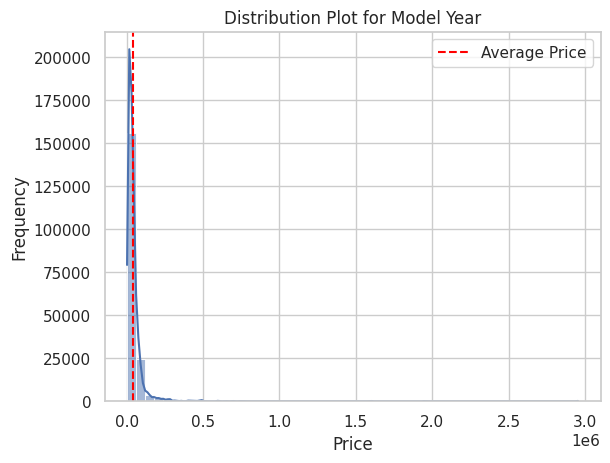

In [76]:
# a histogram of the distirbution of the price
sns.histplot(data['price'], kde = True, bins = 50)
plt.axvline(data['price'].mean(), color='red', linestyle='--', label = 'Average Price')
plt.title('Distribution Plot for Model Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 2.5. Price vs Model Year

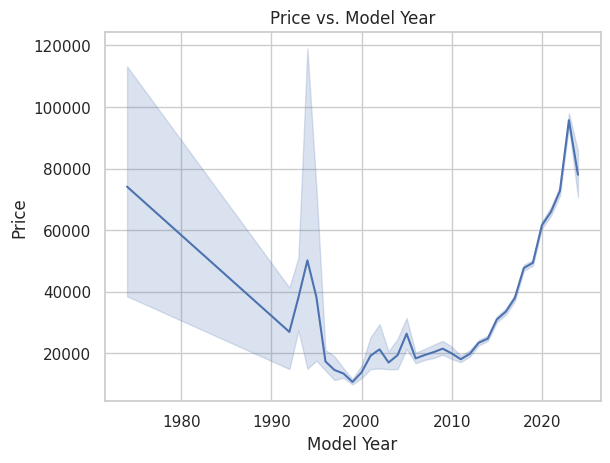

In [77]:
sns.lineplot(data = data, x = 'model_year', y = 'price')
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

## 2.6. Fuel

In [78]:
# understanding the number of fuels across all vehicles
data.fuel_type.value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
E85 Flex Fuel,5406
Diesel,3955
–,781
Plug-In Hybrid,521
not supported,15


In [79]:
# examining the vehicles that have a value 'not supported' under the 'fuel_type' column
data[data['fuel_type'] ==  'not supported'].head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4823,4823,Chevrolet,Suburban LT,2011,109646,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Beige,None reported,Yes,18998
18000,18000,Porsche,Camaro 2SS,2015,67000,not supported,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,11500
19182,19182,Nissan,Mirai Limited,2000,131000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,5000
27199,27199,Subaru,Outback 2.5i Limited,2017,116000,not supported,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Gray,Black,At least 1 accident or damage reported,Yes,27499
33030,33030,Nissan,Mirai Limited,2009,137333,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,White,Gray,At least 1 accident or damage reported,Yes,12999


In [80]:
data[data['fuel_type'] ==  '–'].head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
532,532,Dodge,Challenger R/T Scat Pack,2021,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1155,1155,Ford,Mustang GT Premium,2017,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1307,1307,Toyota,Land Cruiser Base,1994,138033,–,–,A/T,Green,Beige,None reported,Yes,11999
1362,1362,Ford,Mustang EcoBoost Premium,2016,43000,–,–,A/T,Blue,Black,None reported,Yes,15500
1741,1741,Chevrolet,Protege DX,1993,94200,–,–,A/T,Red,Gray,None reported,Yes,7599


In [81]:
data[data['fuel_type'] ==  '–']['engine'].value_counts()

,count
engine,
–,772
140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,1
582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel,1
310.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,1
395.0HP 5.7L 8 Cylinder Engine Gasoline/Mild Electric Hybrid,1
188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,1
3.5 Liter,1
3.6L V6 24V MPFI DOHC,1
333.0HP 3.2L Straight 6 Cylinder Engine Gasoline Fuel,1


**Intermediate conclusion:**

*Missing data under the engine column, not necessarily as a NaN but as a '–' results in such under the 'fuel_type' column as well.*

## 2.7. Engine

In [82]:
print("NaN values under the Engine column: ", data.engine.isna().sum())

# number of records with less than 10 characters under the engine column
print("Number of records with less than 10 characters: ", data[data['engine'].str.len() < 10].shape[0])

NaN values under the Engine column:  0
Number of records with less than 10 characters:  4644


## 2.8. Transmission

In [83]:
# understanding the number of transmissions across all vehicles
print(data.transmission.value_counts())

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

# Step 3: Data Cleaning, Pre-Processing & Feature Engineering

## 3.1. Addressing *fuel_type* data quality issues

In [84]:
# fill under the 'fuel_type' column with the value 'Gasoline' if the word 'Gasoline' is mentioned under the 'engine' column
data.loc[data['engine'].str.contains('Gasoline', case = False), 'fuel_type'] = 'Gasoline'

# fill under the 'fuel_type' column with the value 'Hydrogen' if the word 'Hydrogen' is mentioned under the 'engine' column
data.loc[data['engine'].str.contains('Hydrogen', case = False), 'fuel_type'] = 'Hydrogen'

# drop records under the engine column where the value is '–'
data = data[data['engine'] != '–']

data.fuel_type.value_counts()

,count
fuel_type,
Gasoline,169264
E85 Flex Fuel,5403
Diesel,3933
Hybrid,3433
Plug-In Hybrid,520
Hydrogen,16
–,2
not supported,1


Addressing the last 2 remaining records labeled as '–' under the 'fuel_type' column

In [85]:
data[data['fuel_type'] == '–']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
105015,105015,Toyota,Tacoma TRD Pro,2018,31678,–,3.5 Liter,Automatic,Midnight Black Metallic,Graphite w/Gun Metal,None reported,NaN,40998
112813,112813,RAM,1500 Classic Tradesman,2017,133338,–,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Ruby Flare Pearl,Black,At least 1 accident or damage reported,Yes,45999


In [86]:
# make the two remaining records with '–' udner the 'fuel_type' column be 'Gasoline'
data.loc[data['fuel_type'] == '–', 'fuel_type'] = 'Gasoline'
data[data['fuel_type'] == '–']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


Addressing the last remaining record labeled as 'not supported' under the 'fuel_type' column

In [87]:
data[data['fuel_type'] == 'not supported']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4823,4823,Chevrolet,Suburban LT,2011,109646,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,6-Speed A/T,Black,Beige,None reported,Yes,18998


In [88]:
data.loc[data['fuel_type'] == 'not supported', 'fuel_type'] = 'Gasoline'
data[data['fuel_type'] == 'not supported']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [92]:
print("Remaining NaN columns under the 'fuel_type' column: ", data.fuel_type.isna().sum())
data.fuel_type.value_counts()

Remaining NaN columns under the 'fuel_type' column:  5036


,count
fuel_type,
Gasoline,169267
E85 Flex Fuel,5403
Diesel,3933
Hybrid,3433
Plug-In Hybrid,520
Hydrogen,16


In [93]:
data[data['fuel_type'].isna()]['engine']

,engine
11,Electric Motor Electric Fuel System
32,518.0HP Electric Motor Electric Fuel System
51,Dual Motor - Standard
52,518.0HP Electric Motor Electric Fuel System
161,670.0HP Electric Motor Electric Fuel System
174,Electric Motor Electric Fuel System
176,Electric
240,455.0HP Electric Motor Electric Fuel System
283,Electric
379,518.0HP Electric Motor Electric Fuel System


## 3.2. Dropping redundant columns

In [ ]:
# dropping redundant columns
data.drop(columns = ['clean_title', 'int_col', 'ext_col'], inplace = True)


data['fuel_type'].fillna('Electric', inplace = True) # filling the missing values in the 'fuel_type' column with 'Electric'
data.loc[(data['brand'] == 'Tesla') & ( (data['fuel_type'] == 'Gasoline') | (data['fuel_type'] == 'Diesel') ), 'fuel_type'] = 'Electric'

# retrieving the HP, engine volume, and cylinders of each vehicle if such information exists under the 'engine' column
data['HP'] = data['engine'].str.extract('(\d+)\.?\d*HP') #fillna('NA')
data['Engine Volume (Liters)'] = data['engine'].str.extract('(\d+\.?\d*)L')
data['Cylinders'] = data['engine'].str.extract('(\d+)\s*Cylinder|V(\d+)').bfill(axis=1).iloc[:, 0]
data.drop(columns = ['engine'], inplace = True)

num_features = ['model_year', 'milage', 'price']
print(f"Dataframe shape: {data.shape}")

print(data.isna().sum(), '\n')

print(data.dtypes, '\n')

data[num_features].describe().apply(lambda s: s.apply('{0:.0f}'.format))

## 3.2. Feature Enginnering

### 3.3. Milage & Price

In [90]:
####################################################### milage & price categorical labels #######################################################
milage_brackets = [100, 25000, 58000, 95000, float('inf')]
milage_labels = ['Low Milage (100-25k)', 'Low-to-Medium Milage (25k-58k)', 'Medium-to-High Milage (58k-95k)', 'High Milage (95k+)']

price_brackets = [2000, 17000, 31000, 50000, float('inf')]
price_labels = ['Low End (2k-17k)', 'Low-to-Medium End (17k-31k)', 'Medium-to-High End (31k-50k)', 'High End (50k+)']

# Apply pd.cut with meaningful labels
data['milage_bracket'] = pd.cut(data['milage'], bins=milage_brackets, labels=milage_labels, include_lowest=True)
data['price_bracket'] = pd.cut(data['price'], bins=price_brackets, labels=price_labels, include_lowest=True)

data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,milage_bracket,price_bracket
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,High Milage (95k+),Low End (2k-17k)
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,High Milage (95k+),Low End (2k-17k)
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability,A/T,Blue,Gray,None reported,Yes,13900,High Milage (95k+),Low End (2k-17k)
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Low Milage (100-25k),Medium-to-High End (31k-50k)
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Low Milage (100-25k),High End (50k+)


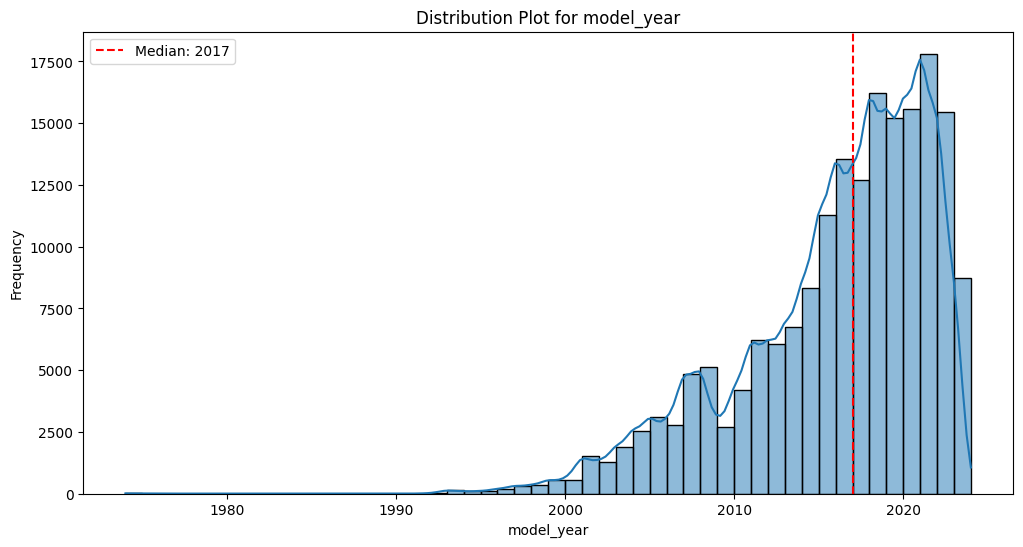

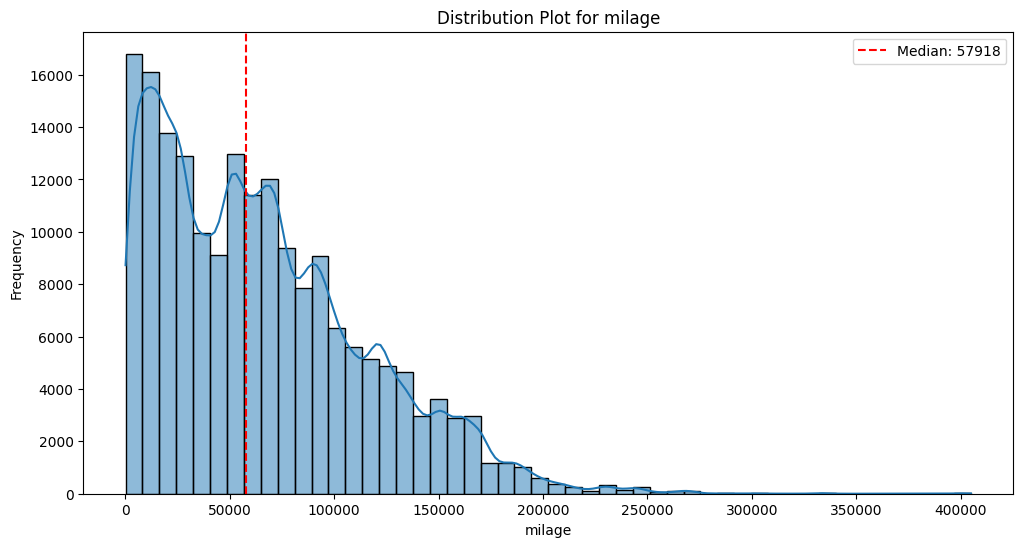

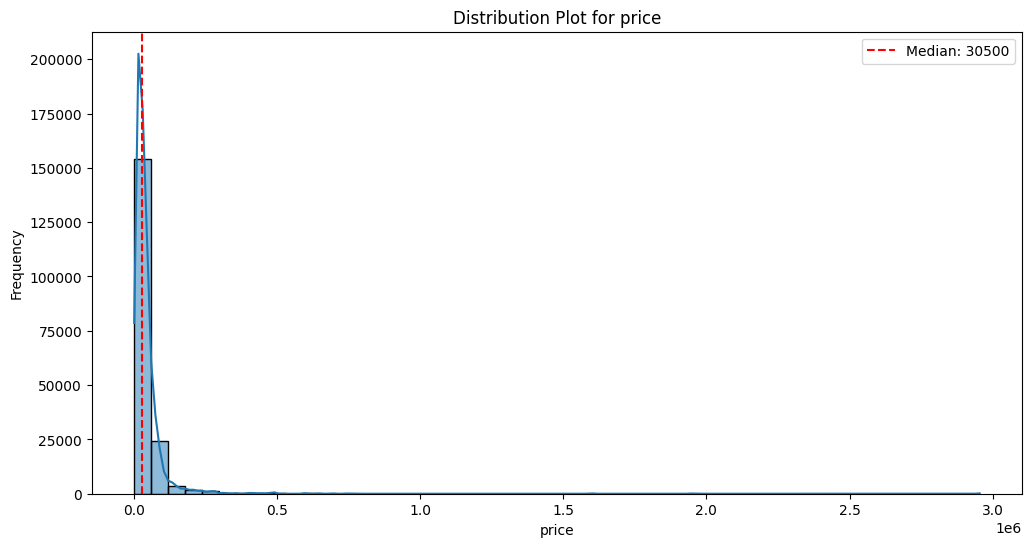

In [ ]:
def plot_numeric_features(df, feature):
  plt.figure(figsize = (12, 6))
  sns.histplot(data[feature], kde = True, bins = 50)
  median_price = data[feature].median().astype(int)
  plt.axvline(median_price, color='red', linestyle='--', label = f'Median: {median_price}')
  plt.title(f'Distribution Plot for {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

plot_numeric_features(data, 'model_year')
plot_numeric_features(data, 'milage')
plot_numeric_features(data, 'price')

## Analysing Accidents

Text(0, 0.5, 'Count')

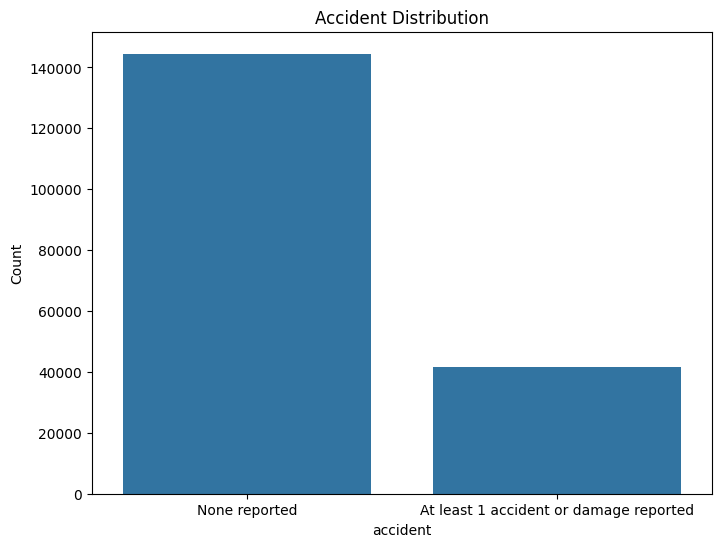

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='accident', data=data)
plt.title('Accident Distribution')
plt.ylabel('Count')

In [ ]:
sns.heatmap(data[num_features].corr(), annot = True)

# Data Pre-Processing & Feature Engineering

1. Handling Outliers

2. Feature Scaling of numeric features & one-hot encoding of categorical features

3. Cross Validation

4. Hyperaparmeter Tuning through GridSearchCV or RandomSearchCV

5. Fit-transform on train data and only transform on test data


## Outlier Removal

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

df_train_no_outliers = remove_outliers_iqr(data, 'milage')
df_train_no_outliers = remove_outliers_iqr(df_train_no_outliers, 'price')
df_train_no_outliers.reset_index(drop=True, inplace=True)

# Model Training

In [ ]:
# Features and target
X = data.drop(columns = ['price'])
y = data['price']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', Pipeline(steps = [
            ('imputer', SimpleImputer(strategy = 'mean')),
            ('scaler', RobustScaler())
        ]), ['model_year', ]),
        ('cat', OneHotEncoder(), ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident'])
    ])

# Creating the model pipeline
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_jobs = -1))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# Fitting the model
with tqdm(total=1, desc="Training Model") as pbar:
  model.fit(X_train, y_train)
  pbar.update(1)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training Model:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("Mean Squared Error:", mse)

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("Feature Importance Ranking:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {importances[idx]}")
